In [2]:
import VQs
import Tools
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sparse_ternary_networks.Tools import SubbandPCA_whitner

In [2]:
N_test = 10000
N_train = 1000

In [3]:
SourceDict = {}
##           SType:  (m,n,SourceParam,lmda,gamma_p,numSB)
# SourceDict['iid'] =      (256, 1000,  1,      1e5,      0.99)
# SourceDict['VarDecay'] = (256, 1000,  0.01,   1,        1.1)
# SourceDict['AR1'] =      (256, 1000,  0.99,   0.01,     1.0,        1)
SourceDict['MNIST'] =    (256, 784,   1,      1e-8,     0.1,        1)
# SourceDict['CYale'] =    (256, 32256, 1,      1e-3,     0.1,       64)

for SType,SParams in SourceDict.items():
    exec('dist_Kmeans1_'+ SType + '_train =  []')
    exec('dist_Kmeans1_'+ SType + '_test =  []')
    exec('dist_Kmeans2_'+ SType + '_train =  []')
    exec('dist_Kmeans2_'+ SType + '_test =  []')
    exec('dist_VRKmeans_'+ SType + '_train =  []')
    exec('dist_VRKmeans_'+ SType + '_test =  []')

In [4]:
numRep = 5
for repInd in range(numRep):
    print('repetition = ', repInd)
    for SType,SParams in SourceDict.items():
        print(' ########################  SType = ', SType, '################################')
        F_train,F_test = Tools.data_generator(SParams[1],N_train,N_test,SType,SourceParam=SParams[2])
        norm_train = np.divide(np.linalg.norm(F_train) ** 2, np.prod(F_train.shape))
        norm_test = np.divide(np.linalg.norm(F_test) ** 2, np.prod(F_test.shape))
        ###############################################
        # K-means training (before possible whitening):
        Kmeans_train = VQs.VR_Kmeans(SParams[0],lmda=0,init_method='Data',num_iter=(10,0))
        _,_,_ = Kmeans_train.run(F_train)
        exec('dist_Kmeans1_'+ SType + '_train.append(Kmeans_train.distortion/norm_train)')
        print(' \n ................................... Train set distortion = ',Kmeans_train.distortion/norm_train)
        # K-means testing:
        Kmeans_test = VQs.VQ_unit(Kmeans_train.C)
        F_out,_,_ = Kmeans_test.run(F_test)
        exec('dist_Kmeans1_'+ SType + '_test.append(Kmeans_test.distortion/norm_test)')
        print(' ................................... Test set distortion = ',Kmeans_test.distortion/norm_test)
        ######### Whitening:
        if SType in ['MNIST', 'AR1', 'CYale']:
            F_train,EigVecs,dim_means = SubbandPCA_whitner(F_train,numSB=SParams[5],EigVecs=None,dim_means=None)
            F_test,_,_ = SubbandPCA_whitner(F_test,numSB=1,EigVecs=EigVecs,dim_means=dim_means)
        ###############################################
        # K-means training (after possible whitening):
        del Kmeans_train
        del Kmeans_test
        Kmeans_train = VQs.VR_Kmeans(SParams[0],lmda=0,init_method='Data',num_iter=(10,0))
        _,_,_ = Kmeans_train.run(F_train)
        exec('dist_Kmeans2_'+ SType + '_train.append(Kmeans_train.distortion/norm_train)')
        print(' \n ................................... Train set distortion = ',Kmeans_train.distortion/norm_train)
        # K-means testing:
        Kmeans_test = VQs.VQ_unit(Kmeans_train.C)
        F_out,_,_ = Kmeans_test.run(F_test)
        exec('dist_Kmeans2_'+ SType + '_test.append(Kmeans_test.distortion/norm_test)')
        print(' ................................... Test set distortion = ',Kmeans_test.distortion/norm_test)    
        ###############################################
        # VR-Kmeans training:
        VRKmeans_train = VQs.VR_Kmeans(SParams[0],lmda=SParams[3],init_method='Data',num_iter=(10,8),eta=5e-1,gamma_p=SParams[4])
        _,_,_ = VRKmeans_train.run(F_train)
        exec('dist_VRKmeans_'+ SType + '_train.append(VRKmeans_train.distortion/norm_train)')
        print(' \n ................................... Train set distortion = ',VRKmeans_train.distortion/norm_train)
        # VR-Kmeans testing:
        VRKmeans_test = VQs.VQ_unit(VRKmeans_train.C)
        F_out,_,_ = VRKmeans_test.run(F_test)
        exec('dist_VRKmeans_'+ SType + '_test.append(VRKmeans_test.distortion/norm_test)')
        print(' ................................... Test set distortion = ',VRKmeans_test.distortion/norm_test)
#         del VRKmeans_train
#         del VRKmeans_test
        

repetition =  0
 ########################  SType =  MNIST ################################


/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  1  (J =  0.0265859333972 ) ****** iter =  2  (J =  0.0134963525617 ) ****** iter =  3  (J =  0.0130448511099 ) ****** iter =  4  (J =  0.0129226615552 ) ****** iter =  5  (J =  0.0128922201766 ) ****** iter =  6  (J =  0.0128922201766 ) ****** iter =  7  (J =  0.0128922201766 ) *** 
 ................................... Train set distortion =  0.210423533866
 ................................... Test set distortion =  0.345205123469


/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  1  (J =  0.0202827421854 ) ****** iter =  2  (J =  0.0127106441672 ) ****** iter =  3  (J =  0.0124354132438 ) ****** iter =  4  (J =  0.0123492515363 ) ****** iter =  5  (J =  0.0123399237148 ) ****** iter =  6  (J =  0.0123399237148 ) ****** iter =  7  (J =  0.0123399237148 ) *** 
 ................................... Train set distortion =  0.201409091695
 ................................... Test set distortion =  0.341016658142
*** iter =  1  (J =  0.0193835073165 ) ***

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  2  (J =  0.0135213578408 ) ****** iter =  3  (J =  0.0132549252645 ) ****** iter =  4  (J =  0.013149174537 ) ****** iter =  5  (J =  0.0131306120688 ) ****** iter =  6  (J =  0.0131255195766 ) ****** iter =  7  (J =  0.0131162534596 ) ****** iter =  8  (J =  0.0131162533736 ) ****** iter =  9  (J =  0.0131162533738 ) *** 
 ................................... Train set distortion =  0.213574837843
 ................................... Test set distortion =  0.33411085097
repetition =  1
 ########################  SType =  MNIST ################################
*** iter =  1  (J =  0.0268123778013 ) ****** iter =  2  (J =  0.0139273972438 ) ****** iter =  3  (J =  0.0134361820928 ) ****** iter =  4  (J =  0.0132954661864 ) ****** iter =  5  (J =  0.0132238157222 ) ****** iter =  6  (J =  0.0132156156914 ) ****** iter =  7  (J =  0.0132156156914 ) ****** iter =  8  (J =  0.0132156156914 ) *** 
 ................................... Train set distortion =  0.214330601986
 .......

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  1  (J =  0.0211539990903 ) ****** iter =  2  (J =  0.0131322282652 ) ****** iter =  3  (J =  0.0128949250221 ) ****** iter =  4  (J =  0.0128332235923 ) ****** iter =  5  (J =  0.0128226267636 ) ****** iter =  6  (J =  0.0128226267636 ) ****** iter =  7  (J =  0.0128226267636 ) *** 
 ................................... Train set distortion =  0.207957115088
 ................................... Test set distortion =  0.342279365556
*** iter =  1  (J =  0.0201853089812 ) ***

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  2  (J =  0.013913106137 ) ****** iter =  3  (J =  0.0137076634579 ) ****** iter =  4  (J =  0.0136825532721 ) ****** iter =  5  (J =  0.0136761669653 ) ****** iter =  6  (J =  0.013671065769 ) ****** iter =  7  (J =  0.0136696827422 ) ****** iter =  8  (J =  0.0136696827026 ) ****** iter =  9  (J =  0.0136696827025 ) *** 
 ................................... Train set distortion =  0.22119341377
 ................................... Test set distortion =  0.338082500908
repetition =  2
 ########################  SType =  MNIST ################################
*** iter =  1  (J =  0.0266784415682 ) ****** iter =  2  (J =  0.0137534970403 ) ****** iter =  3  (J =  0.0132628234683 ) ****** iter =  4  (J =  0.0131586061402 ) ****** iter =  5  (J =  0.0131281105073 ) ****** iter =  6  (J =  0.013113516094 ) ****** iter =  7  (J =  0.0131044144203 ) ****** iter =  8  (J =  0.0130952224737 ) ****** iter =  9  (J =  0.01308657688 ) ****** iter =  10  (J =  0.01308657688 ) *** 
 ....

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  2  (J =  0.0131812727157 ) ****** iter =  3  (J =  0.0129428894299 ) ****** iter =  4  (J =  0.0128905828249 ) ****** iter =  5  (J =  0.0128858002301 ) ****** iter =  6  (J =  0.0128832474464 ) ****** iter =  7  (J =  0.0128832474464 ) ****** iter =  8  (J =  0.0128832474464 ) *** 
 ................................... Train set distortion =  0.211503013414
 ................................... Test set distortion =  0.340447495931
*** iter =  1  (J =  0.019964876145 ) ***

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  2  (J =  0.0137625948715 ) ****** iter =  3  (J =  0.0135629564546 ) ****** iter =  4  (J =  0.0135149884913 ) ****** iter =  5  (J =  0.0134966927683 ) ****** iter =  6  (J =  0.0134966926612 ) ****** iter =  7  (J =  0.0134966926618 ) *** 
 ................................... Train set distortion =  0.221076835366
 ................................... Test set distortion =  0.336209485072
repetition =  3
 ########################  SType =  MNIST ################################
*** iter =  1  (J =  0.0266171533641 ) ****** iter =  2  (J =  0.0136972665885 ) ****** iter =  3  (J =  0.0132529515211 ) ****** iter =  4  (J =  0.0131266354475 ) ****** iter =  5  (J =  0.0130999876271 ) ****** iter =  6  (J =  0.0130983783609 ) ****** iter =  7  (J =  0.0130983783609 ) ****** iter =  8  (J =  0.0130983783609 ) *** 
 ................................... Train set distortion =  0.219121257954
 ................................... Test set distortion =  0.347000801656


/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  1  (J =  0.0208274666095 ) ****** iter =  2  (J =  0.0130938217167 ) ****** iter =  3  (J =  0.0128458307711 ) ****** iter =  4  (J =  0.0127966597528 ) ****** iter =  5  (J =  0.0127805545527 ) ****** iter =  6  (J =  0.0127805545527 ) ****** iter =  7  (J =  0.0127805545527 ) *** 
 ................................... Train set distortion =  0.213804420195
 ................................... Test set distortion =  0.344426063143
*** iter =  1  (J =  0.0197734294098 ) ***

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  2  (J =  0.0135475310223 ) ****** iter =  3  (J =  0.0133146925889 ) ****** iter =  4  (J =  0.0132632076303 ) ****** iter =  5  (J =  0.0132422552954 ) ****** iter =  6  (J =  0.0132379199546 ) ****** iter =  7  (J =  0.0132373214766 ) ****** iter =  8  (J =  0.0132373214704 ) ****** iter =  9  (J =  0.0132373214704 ) *** 
 ................................... Train set distortion =  0.220925775003
 ................................... Test set distortion =  0.337999318885
repetition =  4
 ########################  SType =  MNIST ################################


/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  1  (J =  0.0269051445634 ) ****** iter =  2  (J =  0.0137321319166 ) ****** iter =  3  (J =  0.0132530228426 ) ****** iter =  4  (J =  0.0130783791528 ) ****** iter =  5  (J =  0.0129887733235 ) ****** iter =  6  (J =  0.0129657592486 ) ****** iter =  7  (J =  0.0129629609792 ) ****** iter =  8  (J =  0.0129629609792 ) ****** iter =  9  (J =  0.0129629609792 ) *** 
 ................................... Train set distortion =  0.215397391512
 ................................... Test set distortion =  0.347916395763
*** iter =  1  (J =  0.0207193313235 ) ***

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  2  (J =  0.0130544501637 ) ****** iter =  3  (J =  0.0128490851329 ) ****** iter =  4  (J =  0.0128262125952 ) ****** iter =  5  (J =  0.0128173024835 ) ****** iter =  6  (J =  0.0128155763651 ) ****** iter =  7  (J =  0.0128155763651 ) ****** iter =  8  (J =  0.0128155763651 ) *** 
 ................................... Train set distortion =  0.212948393827
 ................................... Test set distortion =  0.344651144596
*** iter =  1  (J =  0.0193803643676 ) ***

/home/sssohrab/Dropbox/Py/Projects/RRQ/Tools.py:55: RuntimeWarning: divide by zero encountered in true_divide
  np.abs(np.sum(0.5 * (1 / n) * np.log2(np.maximum(1, Sigma2_nz / gamma))) - Rate)


*** iter =  2  (J =  0.0135063551184 ) ****** iter =  3  (J =  0.0133260157431 ) ****** iter =  4  (J =  0.0132616679308 ) ****** iter =  5  (J =  0.0132362810244 ) ****** iter =  6  (J =  0.0132309614249 ) ****** iter =  7  (J =  0.0132309613695 ) ****** iter =  8  (J =  0.0132309613696 ) *** 
 ................................... Train set distortion =  0.219325004681
 ................................... Test set distortion =  0.338788107993


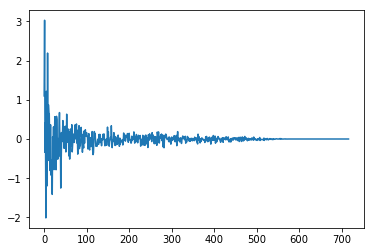

In [5]:
plt.plot(F_test[:,0])

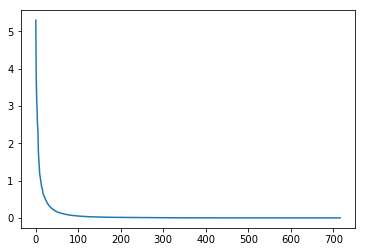

In [6]:
plt.plot(VRKmeans_train.Sigma2)

In [7]:
# print(np.mean(dist_Kmeans1_iid_train))
# print(np.mean(dist_Kmeans1_iid_test))
# print(np.mean(dist_Kmeans2_iid_train))
# print(np.mean(dist_Kmeans2_iid_test))
# print(np.mean(dist_VRKmeans_iid_train))
# print(np.mean(dist_VRKmeans_iid_test))

In [8]:
# print(np.mean(dist_Kmeans1_VarDecay_train))
# print(np.mean(dist_Kmeans1_VarDecay_test))
# print(np.mean(dist_Kmeans2_VarDecay_train))
# print(np.mean(dist_Kmeans2_VarDecay_test))
# print(np.mean(dist_VRKmeans_VarDecay_train))
# print(np.mean(dist_VRKmeans_VarDecay_test))

In [9]:
# print(np.mean(dist_Kmeans1_AR1_train))
# print(np.mean(dist_Kmeans1_AR1_test))
# print(np.mean(dist_Kmeans2_AR1_train))
# print(np.mean(dist_Kmeans2_AR1_test))
# print(np.mean(dist_VRKmeans_AR1_train))
# print(np.mean(dist_VRKmeans_AR1_test))

In [10]:
print(np.mean(dist_Kmeans1_MNIST_train))
print(np.mean(dist_Kmeans1_MNIST_test))
print(np.mean(dist_Kmeans2_MNIST_train))
print(np.mean(dist_Kmeans2_MNIST_test))
print(np.mean(dist_VRKmeans_MNIST_train))
print(np.mean(dist_VRKmeans_MNIST_test))

0.214822767632
0.346911792981
0.209524406844
0.342564145474
0.219219173333
0.337038052766
